In [12]:
%pylab notebook
import glob
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import os
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [13]:
#%cd /projects/PMESDR/vagrant/NSIDCtest/vmwintryhummock
%cd /projects/PMESDR/vagrant/brodzik

/projects/PMESDR/vagrant/brodzik


In [14]:
oldList = sorted(glob.glob("F16_v1.2/*nc"))
newList = sorted(glob.glob("F16_v1.3/*nc"))
print('\n'.join(oldList))
print("")
print('\n'.join(newList))

F16_v1.2/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005307-19H-E-GRD-CSU-v1.2.nc
F16_v1.2/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005307-19H-M-GRD-CSU-v1.2.nc
F16_v1.2/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005307-19V-E-GRD-CSU-v1.2.nc
F16_v1.2/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005307-19V-M-GRD-CSU-v1.2.nc
F16_v1.2/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005307-22V-E-GRD-CSU-v1.2.nc
F16_v1.2/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005307-22V-M-GRD-CSU-v1.2.nc
F16_v1.2/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005307-37H-E-GRD-CSU-v1.2.nc
F16_v1.2/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005307-37H-M-GRD-CSU-v1.2.nc
F16_v1.2/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005307-37V-E-GRD-CSU-v1.2.nc
F16_v1.2/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005307-37V-M-GRD-CSU-v1.2.nc
F16_v1.2/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005307-91H-E-GRD-CSU-v1.2.nc
F16_v1.2/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005307-91H-M-GRD-CSU-v1.2.nc
F16_v1.2/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005307-91V-E-GRD-CSU-v1.2.nc
F16_v1.2/NSIDC-0630-EASE2_N25km-F16_SSMIS-2005307-91V-M-GRD-CSU-

In [4]:
def read_cetb(file):
    fid = Dataset(file, 'r', format='NETCDF4')
    data = np.squeeze(fid.variables['TB'][:])
    fid.close()
    print(file)
    print(np.shape(data))
    print(np.amin(data), np.amax(data))
    return(data)   

In [57]:
def show_both(file1, file2, portrait=False):
    img1 = read_cetb(file1)
    img2 = read_cetb(file2)
    
    if portrait:
        fig, ax = plt.subplots(2, 1, figsize=(9.5,9))
    else:
        fig, ax = plt.subplots(1, 2, figsize=(10,6))
        
    ax[0].imshow(img1, cmap=plt.cm.gray, interpolation='None', vmin=50., vmax=300.)
    ax[0].set_title('v1.2')
    ax[0].axis('off')
    ax[1].imshow(img2, cmap=plt.cm.gray, interpolation='None', vmin=50., vmax=300.)
    ax[1].set_title('v1.3')
    ax[1].axis('off')
    
    fileName = os.path.basename(file1)
    fig.suptitle(fileName)
    fig.tight_layout()
    fig.savefig("%s.both.png" % fileName)
    return(fig)

F16_v1.2/NSIDC-0630-EASE2_T6.25km-F16_SSMIS-2005307-19H-D-SIR-CSU-v1.2.nc
(2160, 5552)
87.22 325.61
F16_v1.3/NSIDC-0630-EASE2_T6.25km-F16_SSMIS-2005307-19H-D-SIR-CSU-v1.3.nc
(2160, 5552)
91.21 325.61


<IPython.core.display.Javascript object>


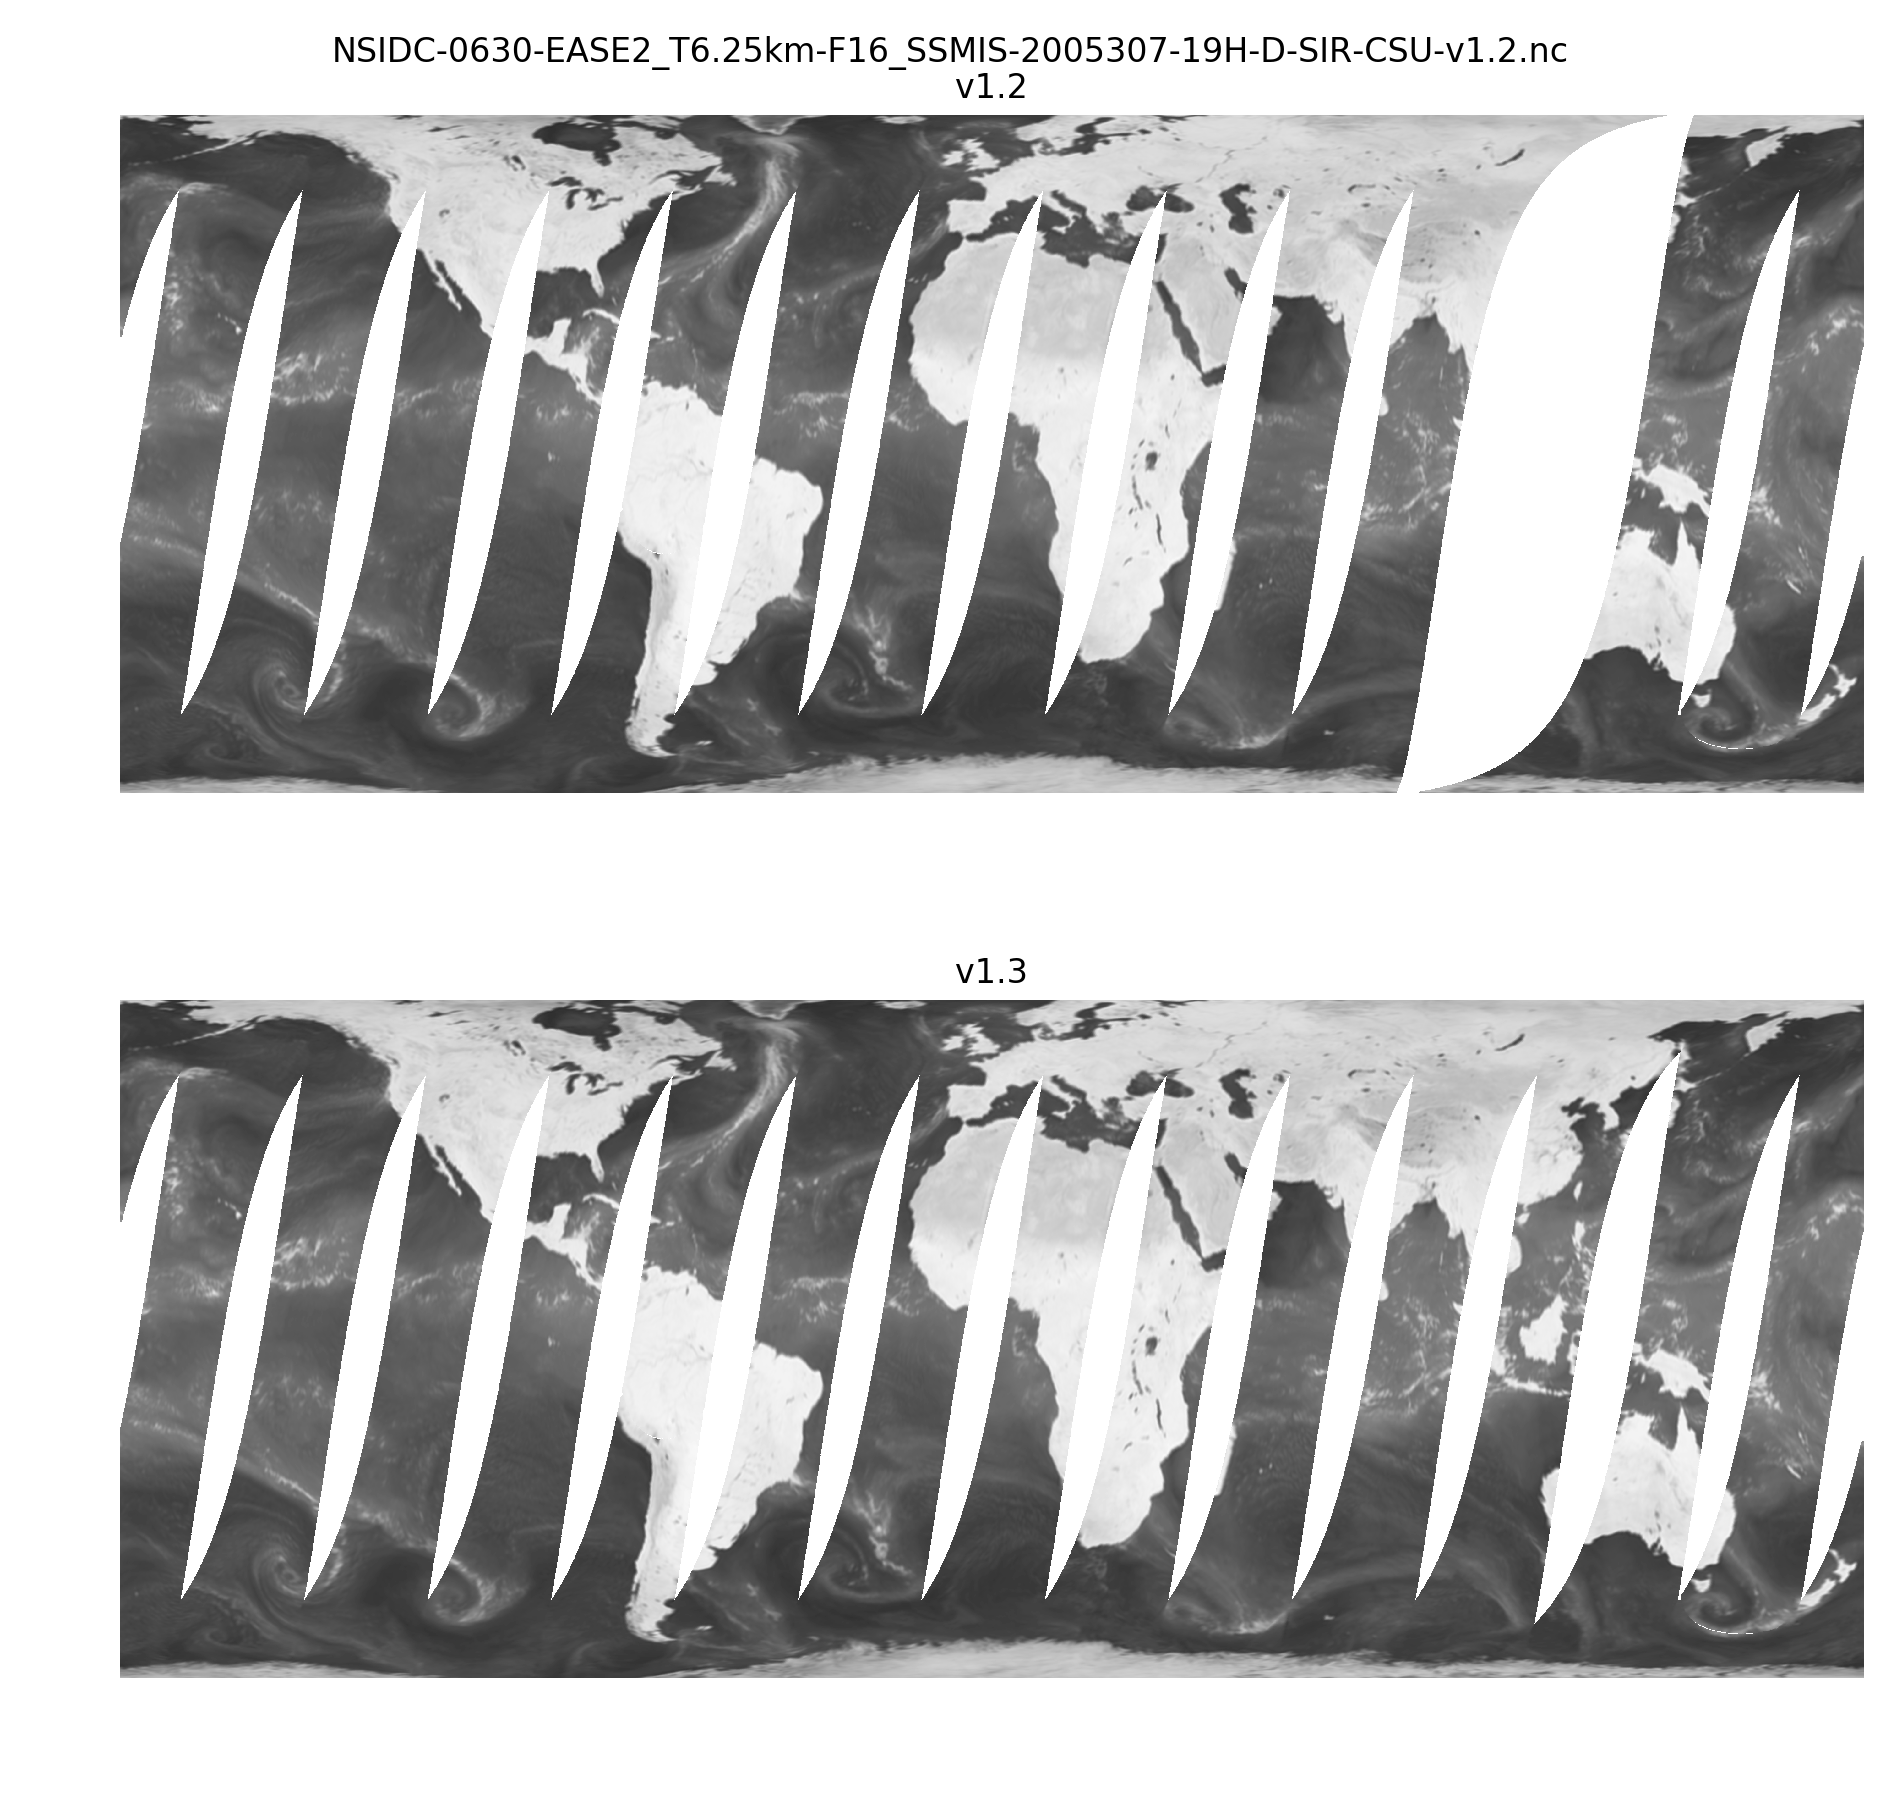

In [61]:
file_index = 79
fig = show_both(oldList[file_index], newList[file_index], portrait=True)

In [60]:
def show_diff(file1, file2):
    img1 = read_cetb(file1)
    img2 = read_cetb(file2)
    
    diff = img2 - img1
    
    print("%s - %s" % (file2, file2))
    print(np.shape(diff))
    print(np.amin(diff), np.amax(diff))
    
    diff[ diff==0 ] = np.nan
    
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    im = ax.imshow(diff, cmap=plt.cm.BrBG, interpolation='None', vmin=-10., vmax=10.)
    ax.set_title('v1.3 - v1.2')
    ax.axis('off')
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    fileName = os.path.basename(file1)
    fig.suptitle(fileName)
    fig.tight_layout()
    fig.savefig("%s.diff.png" % fileName)
    return(fig)

F16_v1.2/NSIDC-0630-EASE2_T25km-F16_SSMIS-2005307-19H-D-GRD-CSU-v1.2.nc
(540, 1388)
96.869995 292.12
F16_v1.3/NSIDC-0630-EASE2_T25km-F16_SSMIS-2005307-19H-D-GRD-CSU-v1.3.nc
(540, 1388)
96.869995 292.12
F16_v1.3/NSIDC-0630-EASE2_T25km-F16_SSMIS-2005307-19H-D-GRD-CSU-v1.3.nc - F16_v1.3/NSIDC-0630-EASE2_T25km-F16_SSMIS-2005307-19H-D-GRD-CSU-v1.3.nc
(540, 1388)
-24.410004 20.029999


<IPython.core.display.Javascript object>


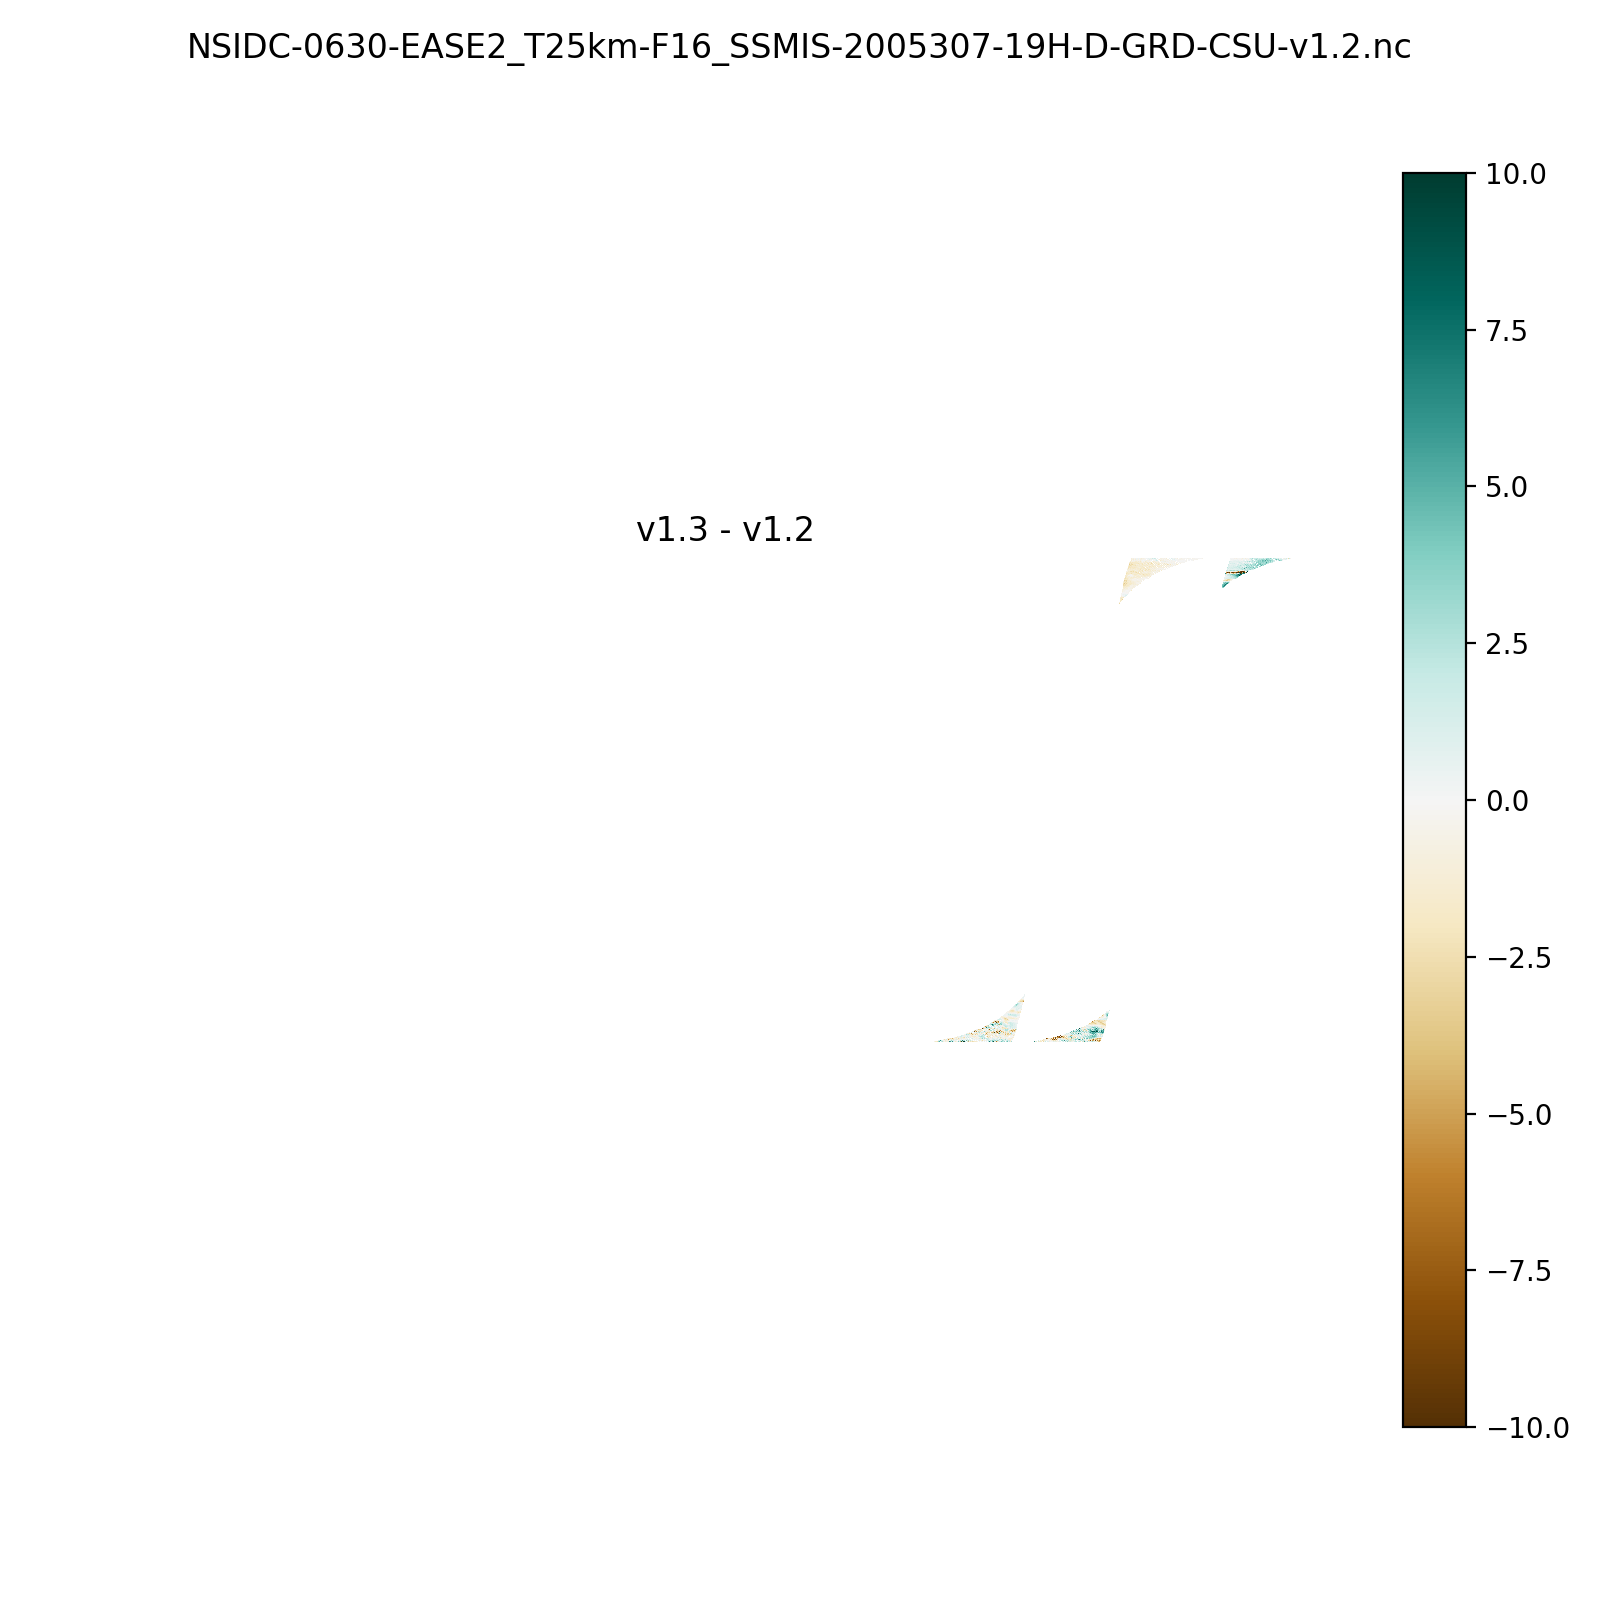

In [26]:
fig = show_diff(oldList[file_index], newList[file_index])

In [ ]:
fig.savefig("%s.diff.png" % os.path.basename(oldList[3]))